In [10]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import *
from tweedejaars_project.utility.misc import flatten_ptu
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import *

df = load_df()
temp = df[110000:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Base
BASIC METRICS
Default
Classification Report
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     39686
        True       0.59      0.64      0.61      2074

    accuracy                           0.96     41760
   macro avg       0.79      0.81      0.80     41760
weighted avg       0.96      0.96      0.96     41760



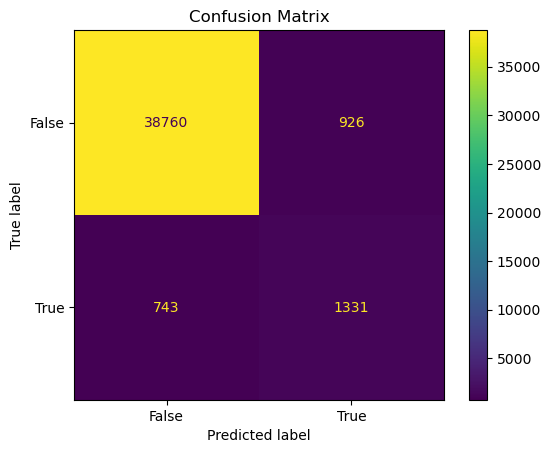

BASIC METRICS
Flattened per PTU
Classification Report
              precision    recall  f1-score   support

       False       0.99      0.94      0.97      2583
        True       0.56      0.92      0.69       201

    accuracy                           0.94      2784
   macro avg       0.78      0.93      0.83      2784
weighted avg       0.96      0.94      0.95      2784



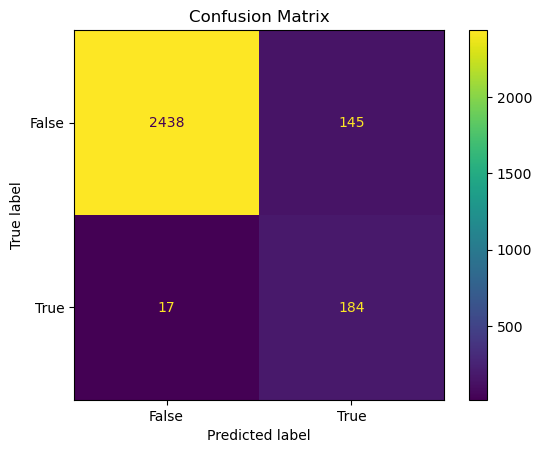

PENALTY SCORE
False negative score (pred/max): 0.6334185848252344, 743/1173
False positive score (pred/max): 0.1462875197472354, 926/6330
TIME SCORE
             neg         pos
count  34.000000  133.000000
mean  -10.470588    0.398496
std     2.149493    0.878531
min   -14.000000    0.000000
25%   -12.000000    0.000000
50%   -10.500000    0.000000
75%    -9.000000    0.000000
max    -7.000000    5.000000
Time taken (pred/max): -1.81437125748503/-9.2874251497006, using 167/167
Adjusted with realtime
BASIC METRICS
Default
Classification Report
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     39686
        True       0.58      0.64      0.61      2074

    accuracy                           0.96     41760
   macro avg       0.78      0.81      0.79     41760
weighted avg       0.96      0.96      0.96     41760



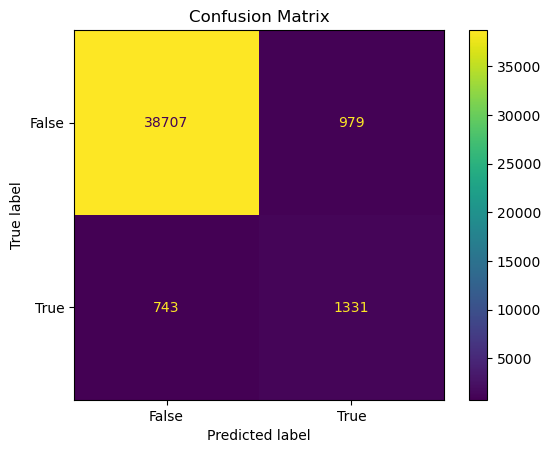

BASIC METRICS
Flattened per PTU
Classification Report
              precision    recall  f1-score   support

       False       0.99      0.94      0.97      2583
        True       0.56      0.92      0.69       201

    accuracy                           0.94      2784
   macro avg       0.78      0.93      0.83      2784
weighted avg       0.96      0.94      0.95      2784



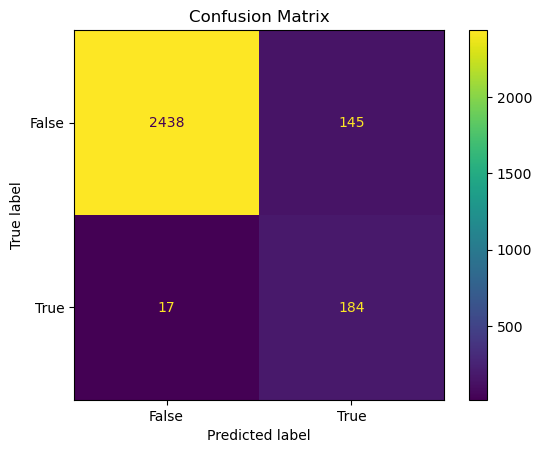

PENALTY SCORE
False negative score (pred/max): 0.6334185848252344, 743/1173
False positive score (pred/max): 0.1462875197472354, 926/6330
TIME SCORE
             neg    pos
count  34.000000  133.0
mean  -10.470588    0.0
std     2.149493    0.0
min   -14.000000    0.0
25%   -12.000000    0.0
50%   -10.500000    0.0
75%    -9.000000    0.0
max    -7.000000    0.0
Time taken (pred/max): -2.1317365269461077/-9.2874251497006, using 167/167
Adjusted with consistency
BASIC METRICS
Default
Classification Report
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     39686
        True       0.39      0.92      0.54      2074

    accuracy                           0.92     41760
   macro avg       0.69      0.92      0.75     41760
weighted avg       0.97      0.92      0.94     41760



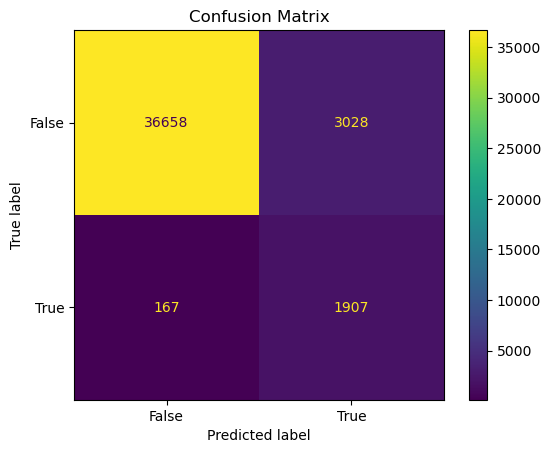

BASIC METRICS
Flattened per PTU
Classification Report
              precision    recall  f1-score   support

       False       0.99      0.94      0.97      2583
        True       0.56      0.92      0.69       201

    accuracy                           0.94      2784
   macro avg       0.78      0.93      0.83      2784
weighted avg       0.96      0.94      0.95      2784



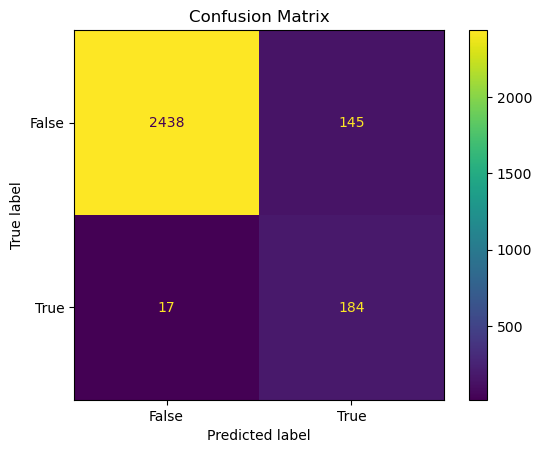

PENALTY SCORE
False negative score (pred/max): 0.1423699914748508, 167/1173
False positive score (pred/max): 0.2484992101105845, 1573/6330
TIME SCORE
              neg  pos
count  167.000000  0.0
mean    -9.287425  NaN
std      3.028184  NaN
min    -14.000000  NaN
25%    -12.000000  NaN
50%     -9.000000  NaN
75%     -7.000000  NaN
max     -3.000000  NaN
Time taken (pred/max): -9.2874251497006/-9.2874251497006, using 167/167
Adjusted with consistency and realtime
BASIC METRICS
Default
Classification Report
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     39686
        True       0.39      0.92      0.54      2074

    accuracy                           0.92     41760
   macro avg       0.69      0.92      0.75     41760
weighted avg       0.97      0.92      0.94     41760



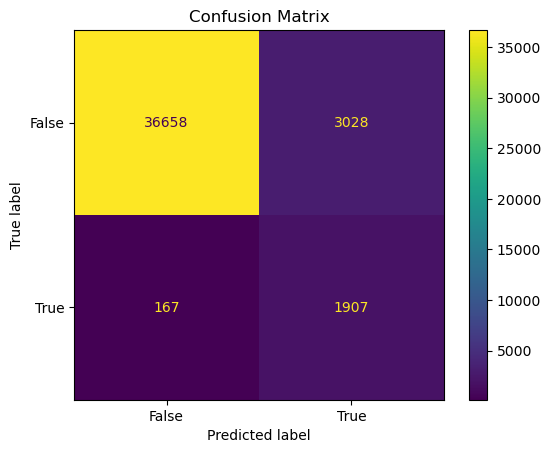

BASIC METRICS
Flattened per PTU
Classification Report
              precision    recall  f1-score   support

       False       0.99      0.94      0.97      2583
        True       0.56      0.92      0.69       201

    accuracy                           0.94      2784
   macro avg       0.78      0.93      0.83      2784
weighted avg       0.96      0.94      0.95      2784



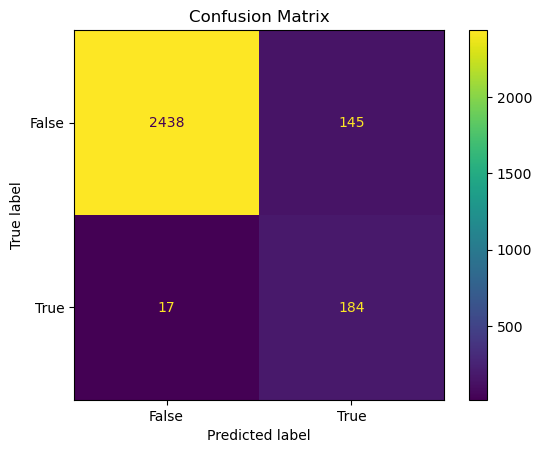

PENALTY SCORE
False negative score (pred/max): 0.1423699914748508, 167/1173
False positive score (pred/max): 0.2484992101105845, 1573/6330
TIME SCORE
              neg  pos
count  167.000000  0.0
mean    -9.287425  NaN
std      3.028184  NaN
min    -14.000000  NaN
25%    -12.000000  NaN
50%     -9.000000  NaN
75%     -7.000000  NaN
max     -3.000000  NaN
Time taken (pred/max): -9.2874251497006/-9.2874251497006, using 167/167


In [11]:
features = [
    'import_capacity',
    'min_price_published',
    'mid_price_published',
    'max_price_published',
    'min_ptu_price_known',
    'max_ptu_price_known',
    'settlement_price_bestguess',
    'time_since_last_two_sided',
    'two_sided_daily_count',
    'PTU',
    'naive_strategy_action',
    'forecast_wind',
    'forecast_solar',
    'forecast_demand',
    'target_two_sided_ptu_realtime'
]
splits = get_splits(df, features, return_dict_pair=False)
m = RandomForestClassifier(n_estimators=50)
# m = HistGradientBoostingRegressor(loss='poisson', l2_regularization=4)
m.fit(splits['train'][0], splits['train'][1])
p = m.predict(splits['valid'][0])
# print(pd.Series(p).describe())
# p = p > 0.5
p = pd.Series(p, dtype=bool)
show_metrics_adjusted(splits['valid'][3], splits['valid'][1], p, splits['valid'][2])


# show_basic_metrics(splits['valid'][1], p, splits['valid'][2], False)
# show_real_penalty_score(splits['valid'][0], splits['valid'][1], p, splits['valid'][2])
# show_time_diff_score(splits['valid'][0], p, splits['valid'][2])


temp = df[110000:] # 110240 target is false maar is wel twoside
# False negative score (pred/max): 0.7635705669481303, 633/829
# False positive score (pred/max): 0.0851063829787234, 568/6674
# False negative score (pred/max): 0.6223358908780904, 730/1173
# False positive score (pred/max): 0.1622432859399684, 1027/6330
# split target and two side
# only check ptu start with neg or naive=true, for train or metric

In [12]:
df['fake_ptu'] = (df['ptu_id'] + 4) % 96 + 1
df['check'] = df['PTU'] == df['fake_ptu'] 
print(df['check'].all())
temp = df[133900:] # 133979 zomertijd jumpt van 8 naar 13

False


In [13]:
# Calculate the time difference between consecutive rows
df['time_diff'] = df['datetime'].diff()

# Check if all time differences are equal to one minute
is_every_minute = (df['time_diff'] == pd.Timedelta(minutes=1))[1:].all()
is_every_minute

True